In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.linear_model import LinearRegression
import numpy as np

In [3]:
pdc = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/elecsim/data/processed/price_duration_curve/self_priceduration.csv')
pdc.head()

,Unnamed: 0,accepted_price,day,segment_demand,segment_hour,year
0,0,87.007864,0,50838.291593,26.0,2013
1,1,87.007864,0,50708.056873,52.0,2013
2,2,80.447618,0,47280.212265,78.0,2013
3,3,72.045326,0,42479.059234,104.0,2013
4,4,72.045326,0,42444.830878,130.0,2013


In [4]:
pdc = pd.concat([pd.read_csv(f) for f in glob.glob('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/elecsim/data/processed/price_duration_curve/*.csv')],
                      ignore_index=True)

pdc

,Unnamed: 0,accepted_price,day,segment_demand,segment_hour,year
0,0,70.469770,1,41646.725801,31.0,2013
1,1,70.273458,1,40569.784850,62.0,2013
2,2,66.059542,1,36105.071512,93.0,2013
3,3,65.192229,1,35246.858103,124.0,2013
4,4,64.846438,1,33352.610802,155.0,2013
5,5,64.602726,1,32754.866833,186.0,2013
6,6,64.602726,1,32749.022967,217.0,2013
7,7,64.183473,1,31798.977384,248.0,2013
8,8,64.183473,1,31642.027850,279.0,2013
9,9,63.888752,1,31504.279589,310.0,2013


In [5]:
pdc = pdc.drop(columns=['Unnamed: 0', 'day', 'year'])
pdc

,accepted_price,segment_demand,segment_hour
0,70.469770,41646.725801,31.0
1,70.273458,40569.784850,62.0
2,66.059542,36105.071512,93.0
3,65.192229,35246.858103,124.0
4,64.846438,33352.610802,155.0
5,64.602726,32754.866833,186.0
6,64.602726,32749.022967,217.0
7,64.183473,31798.977384,248.0
8,64.183473,31642.027850,279.0
9,63.888752,31504.279589,310.0


In [6]:
pdc_sorted = pdc.sort_values(by='segment_demand')
pdc_sorted.to_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/notebooks/validation-optimisation/data/price_demand_curve_example.csv')
pdc_sorted

,accepted_price,segment_demand,segment_hour
143,10.473615,4636.765716,1560.0
167,10.905967,4751.407851,1032.0
166,10.905967,4792.291645,989.0
142,10.905967,4900.797330,1495.0
141,10.905967,4964.103156,1430.0
165,13.044093,5525.533597,946.0
164,13.256222,5748.616906,903.0
140,10.905967,5789.394956,1365.0
119,13.044093,6378.996750,1968.0
118,13.044093,6620.264916,1886.0


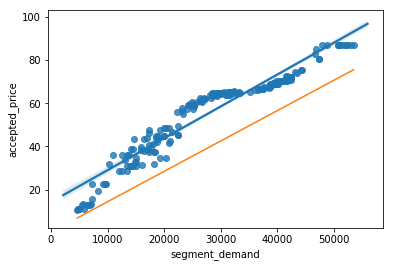

In [7]:
p = sns.regplot(data=pdc_sorted, x='segment_demand', y='accepted_price')
X_line = np.array(pdc_sorted.segment_demand)
Y_line = X_line *0.001406458 +  0.3374438

p.plot(X_line, Y_line)

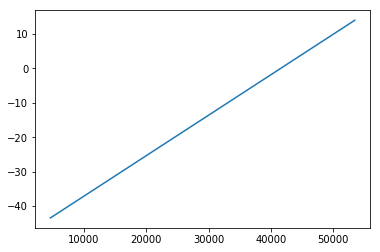

In [8]:
X_line = np.array(pdc_sorted.segment_demand)
Y_line = X_line * 0.0011750253064625267 + -48.87442875281547
plt.plot(X_line, Y_line)

In [9]:
print("m={}".format(LinearRegression().fit(np.array(pdc_sorted.segment_demand).reshape(-1, 1), pdc_sorted.accepted_price).coef_))
print("c={}".format(LinearRegression().fit(np.array(pdc_sorted.segment_demand).reshape(-1, 1), pdc_sorted.accepted_price).intercept_))

m=[0.00147552]
c=14.268274183850039
